In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pylab as plt
%matplotlib inline
import numpy as np
from time import clock
import pickle
from time import clock
#import community as community_louvain
import pandas as pd
import seaborn as sns
import csv 
from networkx.algorithms.community import greedy_modularity_communities
import community as community_louvain
from scipy import stats

### Get the community meta network and its degree distribution by Benaz

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pylab as plt
%matplotlib inline
import numpy as np
from time import clock
import pickle
import seaborn as sns
import csv 
from networkx.algorithms.community import greedy_modularity_communities
import community as community_louvain
def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges
def communities_graph(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.Graph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))
    return hypergraph
G= nx.read_edgelist('/home/bm7mp/git/oss-2020/Pydata/edgelist_0819.txt', nodetype=str, data=(('weight',float),))
partition = community_louvain.best_partition(G)
G_com = communities_graph(G, partition)
in_degrees = dict(G_com.degree(weight='weight')) # dictionary node:degree
in_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_values]
plt.figure() # you need to first do 'import pylab as plt'
plt.grid(True)
plt.plot(in_values, in_hist, 'ro-') # in-degree
# plt.legend(['degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
# plt.title('network of places in Cambridge')
# plt.xlim([0, 2*10**2])
plt.savefig('./home/bm7mp/OS/rnbrw/output/compunity_net_degree_distribution.pdf')
plt.show()
plt.close()

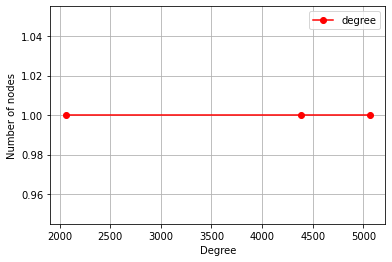

In [111]:
plt.figure() # you need to first do 'import pylab as plt'
plt.grid(True)
plt.plot(in_values, in_hist, 'ro-') # in-degree
# plt.legend(['degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
# plt.title('network of places in Cambridge')
# plt.xlim([0, 2*10**2])
 plt.savefig('./output/cam_net_degree_distribution.pdf')
plt.show()
plt.close()

## DATA

In [2]:
G = nx.read_edgelist('/home/bm7mp/git/oss-2020/Pydata/edgelist_0819.txt', nodetype=str, data=(('weight',float),))

KeyboardInterrupt: 

### This function gives whithin community edges for the result of community detection

In [2]:
### This function gives whithin community edges for the result of community detection
def find_whithin_community_edges(g, partition):

    within_edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci == cj:
            try:
                within_edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                within_edges[(ci, cj)] = [(ni, nj)]

    return within_edges

par = git_luvain_rnbrw
partition= {}
for k,v in par.items():
    for x in v:
        partition.setdefault(x,[]).append(k)
# coverting type of dict values from list to integer:        
for k,v in partition.items():
    strings = [str(integer) for integer in v]
    a_string = "".join(strings)
    partition[k] = int(a_string)
            
whithin_community_edges = find_whithin_community_edges(G, partition)

NameError: name 'git_luvain_rnbrw' is not defined

In [12]:
len(whithin_community_edges.values())

514470

In [ ]:
count_res_indegr

# NMI

In [3]:
def writeMem(InvMem, File): # to convert the file as data files so we can use it for NMI
    """
    the nodes in each community will list in lines:
    1 7 9 10
    2 3 8
    4 5 6
    """
    with open(File,'w') as f:
        w = csv.writer(f, delimiter =' ')
        w.writerows(InvMem.values())

In [6]:
File = 'tmp.dat'

In [ ]:
with open(File,'w') as f:
    w = csv.writer(f, delimiter =' ')
    w.writerows(x)

# RNBRW+Louvain

In [3]:
# Dec 2020
with open('/sfs/qumulo/qhome/bm7mp/OS/rnbrw/gitt_luvain_rnbrw.pickle', 'rb') as handle:
    #This one is obtained Des2020
    git_luvain_rnbrw = pickle.load(handle) # LRN is the membership dictionary
    #each value is an array of nodes on r
Lou_rnbrw_size={}
for k , v in git_luvain_rnbrw.items():
    Lou_rnbrw_size[k] = len(git_luvain_rnbrw[k]) 
    Lou_rnbrw_1 = []# List of nodes that are in single node communities
for k , v in Lou_rnbrw_size.items():
    if Lou_rnbrw_size[k]==1:
        Lou_rnbrw_1.append(k) 

In [4]:
len(Lou_rnbrw_size)-len(Lou_rnbrw_1)

16827

In [9]:
writeMem(git_luvain_rnbrw, '/sfs/qumulo/qhome/bm7mp/OS/rnbrw/gitt_luvain_rnbrw.dat') # write it in the data format

writeMem(git_louvain, 'mmem_luv_rnbrw.dat') # write it in the data format

In [99]:
%%bash
./mutual mmem_luv_rnbrw.dat mmem_luv_rnbrw.dat

mutual3:	0.925


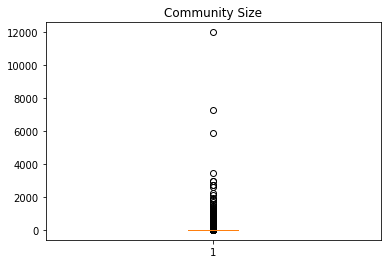

In [16]:
dat = Lou_rnbrw_size.values()
fig1, ax1 = plt.subplots()
ax1.set_title('Community Size')
ax1.boxplot(dat)
#plt.boxplot(data, showfliers=True)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig("Boxplot_rnbrwLouvain.pdf") #Saving the plot
plt.show()

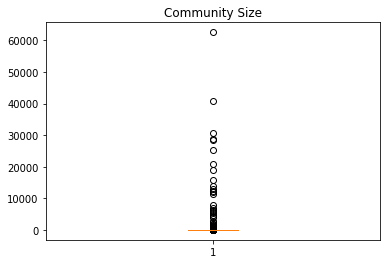

In [136]:
datas =  Louvain_size.values()
fig1, ax1 = plt.subplots()
ax1.set_title('Community Size')
ax1.boxplot(datas)
#plt.boxplot(data, showfliers=True)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig("Boxplot_louv.pdf") #Saving the plot
plt.show()

### RNBRE+Louvain vs Louvain  Community size distributioin

In [6]:
def plot_community_size(D):
    #D is the list of community size
    #1,Dict= Lou_rnbrw_size
     #2,Dict =Lou_size
    s=0
    values = sorted(D.values())
    for i in D:
        s=s+i
    size_hist = [list(D.values()).count(x)/int(s) for x in  values]
    plt.figure() 
    plt.grid(False)
    plt.loglog(values, size_hist, 'b.') 
    #plt.loglog(out_values, out_hist, 'b.') 
    #plt.legend(['In-degree', 'Out-degree'])
    #plt.xlabel('k')
    #plt.ylabel('frequency')
    plt.title('Community Size Distribution')
    plt.xlim(0, 10**5)
    plt.savefig('louv_size_Distribution')    

/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


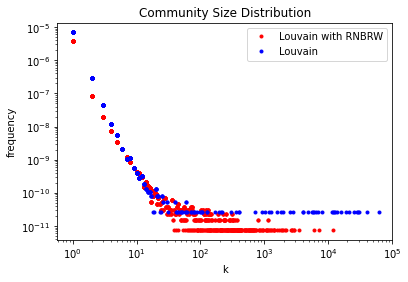

In [7]:
color = ['r.', 'b.']
plt.figure() 
c = 0
for D in [Lou_rnbrw_size, Louvain_size]:
    s=0
    values = sorted(D.values())
    for i in D:
        s=s+i
    size_hist = [list(D.values()).count(x)/int(s) for x in  values]

    plt.grid(False)
    plt.loglog(values, size_hist, color[c]) 
    c = +1
#plt.loglog(out_values, out_hist, 'b.') 
plt.legend(['Louvain with RNBRW', 'Louvain'])
plt.xlabel('k')
plt.ylabel('frequency')
plt.title('Community Size Distribution')
plt.xlim(0, 10**5)
plt.savefig('louv_size_Distribution3.pdf')    

In [8]:
%pwd

'/sfs/qumulo/qhome/bm7mp/git/oss-2020/src/03_github-network-analysis/01_full-networks/04_full-ctr-communities-analysis/01_github-full-network-community-analysis'

In [54]:

plot_community_size(Lou_rnbrw_size)

KeyboardInterrupt: 

In [56]:
plot_community_size(Louvain_size)

NameError: name 'Lou_size' is not defined

b= sns.kdeplot(RNB_L, shade=True, color="r",bw=1)
plt.scatter(RNB_L)
plt.suptitle("Distribution of community size")
plt.savefig('rnbrw_louvain_Distribution')
plt.legend()
b.set(xscale="log")
b.set(yscale='log')

# Louvain

In [4]:
## Decide in thin Dec 2020
with open('/sfs/qumulo/qhome/bm7mp/OS/rnbrw/git_luvain.pickle', 'rb') as handle:
    #this one is only louvain Dec2020
    git_louvain = pickle.load(handle) # LRN is the membership dictionary
    #each value is an array of nodes on r
Louvain_size={}
for k , v in git_louvain.items():
    Louvain_size[k] = len(git_louvain[k]) 
#Louvain
Lou=[] # list of community size values
Lou_1 = []# List of nodes that are in single node communities
for k , v in Louvain_size.items():
    if Louvain_size[k]==1:
        Lou_1.append(k) 
for k, v in Louvain_size.items():
    Lou.append(Louvain_size[k])    

with open('memdict_risolate.pickle', 'rb') as handle:
    r = pickle.load(handle)
    #each value is an array of nodes on r

writeMem(r, 'memdict_risolate.dat') # write it in the data format

In [107]:
%%bash
./mutual memdict_risolate.dat mmem_luv_rnbrw.dat

mutual3:	0.685537


mem_size={}
for k , v in r.items():
    mem_size[k] = len(r[k])  

#Louvain
x=[] 
for k , v in mem_size.items():
    x.append(mem_size[k]) 

    

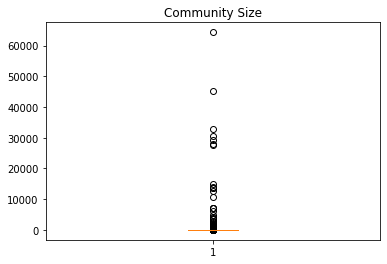

In [13]:
data =  mem_size.values()
fig1, ax1 = plt.subplots()
ax1.set_title('Community Size')
ax1.boxplot(data)
#plt.boxplot(data, showfliers=True)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig("Boxplot.pdf") #Saving the plot
plt.show()

data =  mem_size.values()
fig1, ax1 = plt.subplots()
ax1.set_title('Community Size')

ax1.set_ylim([0,100])
bp=ax1.boxplot(data, showbox=True, sym='k.')

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
#plt.boxplot(data, showfliers=True)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig("Boxplotzoom.pdf") #Saving the plot

plt.show()

No handles with labels found to put in legend.


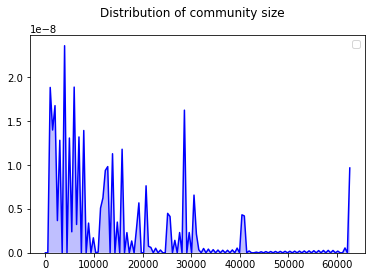

In [26]:
sns.kdeplot(Lou, shade=True, color="blue",bw=1)
plt.suptitle("Distribution of community size")
plt.savefig('louvain_Distribution')
plt.legend()

/apps/software/standard/compiler/gcc/7.1.0/jupyter_conda/2019.10-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  from ipykernel import kernelapp as app


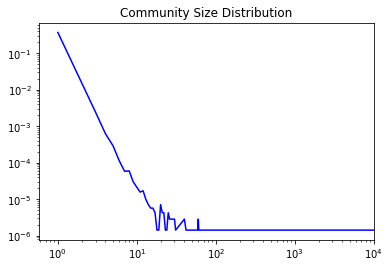

In [94]:
plot_community_size(Lou)
plt.savefig('louv_size_Distribution')

In [87]:
Resolution_Limit= np.sqrt(30201802/2)
print("Resolution Limit:", Resolution_Limit)

Resolution Limit: 3885.9877766148466


### Comparing number of community between RNBRW and louvain:

In [38]:
#Dec 2020
Resolution_Limit= np.sqrt(30201802*2)
print("Resolution Limit:", Resolution_Limit)
Louvain_rnbrw = list(Lou_rnbrw_size.values())
Louvain = list(Louvain_size.values())
count_R = 0
count_80_R=0
count_L = 0
count_80_L=0
for i in Louvain: 
    if i >Resolution_Limit : 
        count_L = count_L + 1
    if 1<i <80 :
        count_80_L=count_80_L+1    
for i in Louvain_rnbrw: 
    if i >Resolution_Limit : 
        count_R = count_R + 1
        
    if 1<i <80 :
        count_80_R=count_80_R+1
print(count_R,count_80_L, count_80_R,count_L)  
#number of community found by both
print("Number of communities with more than one member for RNBRW", len(Lou_rnbrw_size.values())-Louvain_rnbrw.count(1))
print("Number of communities with more than one member for Louvain", len(Louvain_size.values())-Louvain.count(1))
                

Resolution Limit: 7771.975553229693
1 13560 16521 15
Number of communities with more than one member for RNBRW 16827
Number of communities with more than one member for Louvain 13609


In [39]:
Lou_rnbrw_size_sort = sorted(Lou_rnbrw_size.values())
hist_Lou_rnbrw_size = [list(Lou_rnbrw_size.values()).count(x) for x in Lou_rnbrw_size]


In [44]:
pars, cov = curve_fit(f=power_law, xdata=in_values, ydata=in_hist, p0=[1, 2], bounds=(-np.inf, np.inf))

In [45]:
pars

array([1.02351494e-12, 1.99981277e+00])

[Text(1, 0, 'RNBRW'), Text(2, 0, 'Louvain')]

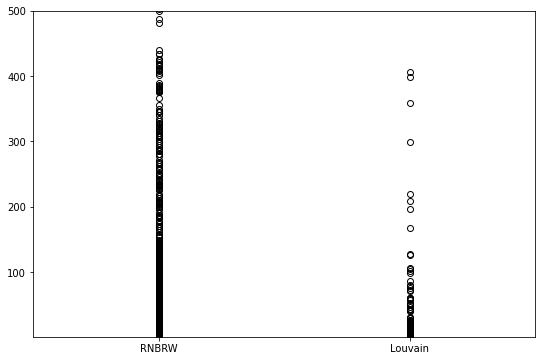

In [189]:
Louvain_rnbrw = list(Lou_rnbrw_size.values())
Louvain = list(Louvain_size.values())
#Louvain = list(mem_size.values())
#RNBRW_L = list(mem_rnbrw_size.values())
data_to_plot = [Louvain_rnbrw, Louvain]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)
ax.set_ylim([1,500])
# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
ax.set_xticklabels(['RNBRW','Louvain'])

[Text(1, 0, 'RNBRW'), Text(2, 0, 'Louvain')]

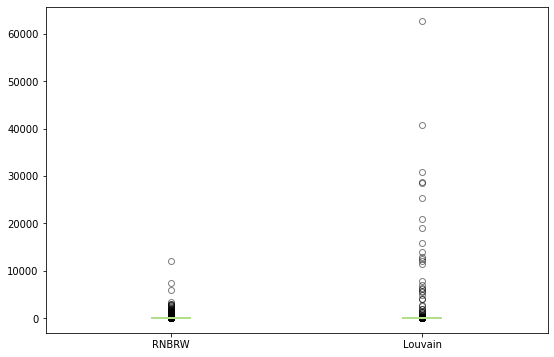

In [190]:
## add patch_artist=True option to ax.boxplot() 
## to get fill color
Louvain_rnbrw = list(Lou_rnbrw_size.values())
Louvain = list(Louvain_size.values())
#Louvain = list(mem_size.values())
#RNBRW_L = list(mem_rnbrw_size.values())
data_to_plot = [Louvain_rnbrw, Louvain]
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot

bp = ax.boxplot(data_to_plot, patch_artist=True)


## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
# Save the figure
fig.savefig('fig22.png', bbox_inches='tight')
ax.set_xticklabels(['RNBRW','Louvain'])



# CNM

In [4]:
G = nx.read_edgelist('/home/bm7mp/git/oss-2020/Pydata/edgelist_0819.txt', nodetype=str, data=(('weight',float),))

In [ ]:
#CNM
from networkx.algorithms.community import greedy_modularity_communities
partition = greedy_modularity_communities(G, weight='weight')
#partition returns a list of frozensets of nodes in each communities
i = 0; CNM = dict() #initiating a counter for comunity number with a dictionary CNM={comunity 1:[nodes]} like a dict invert
for fs in partition: #for each frozensets
    CNM[i] = list(fs) #key = comunity number, value = frozensets converted to list
    i += 1 

In [10]:
a_file = open("CNM.pkl", "wb")
pickle.dump(CNM, a_file)
a_file.close()

In [11]:
a_file = open("CNM.pkl", "rb")
output = pickle.load(a_file)
print(output)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [108]:
writeMem(CNM, 'CNM.dat') # write it in the data format

In [110]:
%%bash
./mutual CNM.dat memdict_risolate.dat

mutual3:	0.206433


In [112]:
%%bash
./mutual CNM.dat mmem_luv_rnbrw.dat

mutual3:	0.219326


In [25]:
CNM_size={}
for k , v in CNM.items():
    CNM_size[k] = len(CNM[k])  

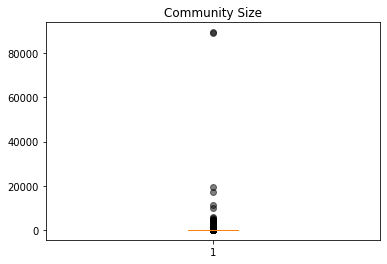

In [21]:
data =  CNM_size.values()
fig1, ax1 = plt.subplots()
ax1.set_title('Community Size')

#ax1.set_ylim([0,100])
bp=ax1.boxplot(data, showbox=True, sym='k.')

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
#plt.boxplot(data, showfliers=True)
#plt.xticks(range(1, len(labels) + 1), labels)
plt.savefig("BoxplotCNM.pdf") #Saving the plot

plt.show()

In [29]:
a=[]
for k, v in CNM_size.items():
    a.append(CNM_size[k])

No handles with labels found to put in legend.


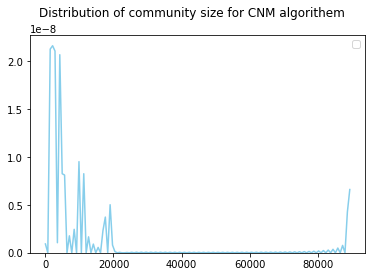

In [53]:

#sns.distplot(a, color='green')
sns.kdeplot(a, shade = False, color='skyblue')
plt.suptitle("Distribution of community size for CNM algorithem")
plt.savefig('CNMDistribution')
plt.legend()

In [ ]:
#sns.distplot(a, color='green')
sns.kdeplot(RNB_L_not1, shade = True,color='deeppink', bw=1)#Louvain
#sns.kdeplot(a, shade = False, color='purple')#CNM
sns.kdeplot(Lou_not1, shade = True,color='blue', bw= 1)# RNBRW+Louvain

plt.suptitle("Distribution of community size by RNBRW and Louvain algorithms")
plt.savefig('Distributions ofcommunity size of  RNBRW+Louvain-1')
plt.legend()

No handles with labels found to put in legend.


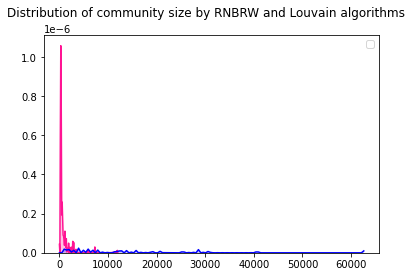

In [214]:
#sns.distplot(a, color='green')
sns.kdeplot(RNB_L, shade = True,color='deeppink', bw=1)#Louvain
#sns.kdeplot(a, shade = False, color='purple')#CNM
sns.kdeplot(Lou, shade = True,color='blue', bw= 1)# RNBRW+Louvain

plt.suptitle("Distribution of community size by RNBRW and Louvain algorithms")
plt.savefig('Distributions ofcommunity size of  RNBRW+Louvain')
plt.legend()

####  whithin community edges for the result of community detection

In [55]:
### This function gives whithin community edges for the result of community detection  # Dec 2020
import collections  
from collections import Counter 
from itertools import chain 
def find_whithin_community_edges(g, partition):

    within_edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci == cj:
            try:
                within_edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                within_edges[(ci, cj)] = [(ni, nj)]

    return within_edges
#par = git_louvain
par = git_luvain_rnbrw #for rnbrw+louvain
partition= {}
for k,v in par.items():
    for x in v:
        partition.setdefault(x,[]).append(k)
# coverting type of dict values from list to integer:        
for k,v in partition.items():
    strings = [str(integer) for integer in v]
    a_string = "".join(strings)
    partition[k] = int(a_string)
           
whithin_community_edges = find_whithin_community_edges(G, partition) 

#### Number of inner link of each community for Louvain+RNBRW

In [169]:
##resoloution limit by indegree, altho in santo forto both are disscussed/ indegree abd resoloution limit
## Decide in thin Dec 2020
a={}
for k, v in whithin_community_edges.items():
    a[k]=len(whithin_community_edges[k])
Resolution_Limit=np.sqrt(30201802*2)
count_res_indegr=0
for k, v in a.items(): 
    if a[k] < Resolution_Limit: 
        count_res_indegr += 1          

#### ### Community network Degree Distribution

In [36]:
#this one is only louvain Dec2020
from scipy.optimize import curve_fit
#with open('/sfs/qumulo/qhome/bm7mp/git/oss-2020/src/03_github-network-analysis/01_full-networks/04_full-ctr-communities-analysis/01_github-full-network-community-analysis/Community_in_degrees/indegree_rnbrw_louvain.pickle', 'rb') as handle:
    #degree_rnbrw_louvain = pickle.load(handle)
with open('/sfs/qumulo/qhome/bm7mp/OS/rnbrw/indegree_louvain.pickle', 'rb') as handle:
    degree_louvain = pickle.load(handle)
#in_degrees= degree_rnbrw_louvain
in_degrees_L= degree_louvain
#s=0
#si=list(in_degrees.values())
#for i in si:
   # s=s+i
in_values = sorted(in_degrees_L.values())
in_hist = [list(in_degrees_L.values()).count(x) for x in in_values]

    #fitting with powerlaw:

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)
# Fit the data to power-law data
pars, cov = curve_fit(f=power_law, xdata=in_values, ydata=in_hist, p0=[1, 1], bounds=(-np.inf, np.inf))
#Pwrlo_parameters_lou= np.array([pars,cov])
#np.savetxt('/sfs/qumulo/qhome/bm7mp/OS/rnbrw/output/Pwrlo_parameters_lou', Pwrlo_parameters_lou, delimiter=',')    
#plt.figure() # you need to first do 'import pylab as plt'
#plt.grid(True)
#plt.loglog(in_values, in_hist, 'o') # in-degree
# plt.legend(['degree'])
#plt.xlabel('Degree')
#plt.ylabel('Number of nodes')
#plt.title('Degree distribution of the commmunity network')
#plt.xlim([0, 2*10**6])
#plt.savefig('/home/bm7mp/OS/rnbrw/output/compunity_net_degree_distribution_louv1.pdf')
#plt.show()
#plt.close()    

In [10]:
with open('/sfs/qumulo/qhome/bm7mp/git/oss-2020/src/03_github-network-analysis/01_full-networks/04_full-ctr-communities-analysis/01_github-full-network-community-analysis/indegree_rnbrw_louvain.pickle', 'rb') as handle:
    degree_rnbrw_louvain = pickle.load(handle)
with open('/sfs/qumulo/qhome/bm7mp/OS/rnbrw/indegree_louvain.pickle', 'rb') as handle:
    degree_louvain = pickle.load(handle)

In [ ]:
color = ['r.', 'b.']
plt.figure() 
c = 0
for D in [degree_rnbrw_louvain, degree_louvain]:
    s=0
    values = sorted(D.values())
    for i in D:
        s=s+i
    size_hist = [list(D.values()).count(x)/int(s) for x in  values]

    plt.grid(False)
    plt.loglog(values, size_hist, color[c]) 
    c = +1
#plt.loglog(out_values, out_hist, 'b.') 
plt.legend(['Louvain with RNBRW', 'Louvain'])
#plt.xlabel('k')
#plt.ylabel('frequency')
plt.title('Community Degree Distribution')
plt.xlim(0, 10**5)
plt.savefig('louv_degree_Distribution4.pdf')    

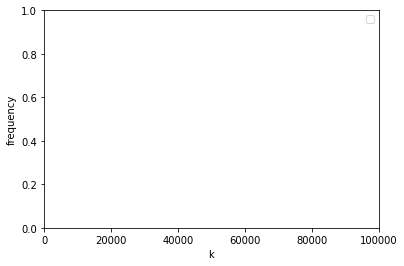

In [32]:
curve_fit(f=power_law, xdata=in_values, ydata=in_hist, p0=[1, 2], bounds=(-np.inf, np.inf))

(array([8.35337824e-12, 1.99760937e+00]),
 array([[ 1.79828735e-11, -3.70737234e-03],
        [-3.70737234e-03,  7.64527722e+05]]))

In [24]:
np.log(max(in_values))

14.29050919137977

In [9]:
# values of  key(community i)=r[i]
# for each community 
d = { 1 : ['z','a',"nmn"], 
2 :'b', 
3 :  ['am'], 
4 : ['nm', 'gbn'] } 
m_hist={}
for k , v in d.items():
    m_hist[k] = len(d[k])  
rm = []k,;/l;                                                                                 ' 'gf
l;l;,,,
for i in d.values():
    rm.append(i)    

SyntaxError: invalid syntax (<ipython-input-9-035f3a4ec502>, line 10)

In [13]:
pars

array([0.13941294, 0.        ])

In [14]:
cov

array([[1.40298437e+05, 1.51261810e-02],
       [1.51261810e-02, 3.18176683e-09]])

In [7]:
x= []
for i in mem_size.values():
    x.append(i)

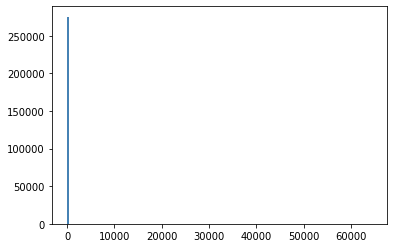

In [11]:
num_bins =150
#, num=num_bins) #<-- Change here.  Note the use of ravel.
plt.hist(x, bins=np.linspace(np.min(x), np.max(x), num= num_bins), color='steelblue')
plt.show()

In [2]:

        edge_color=internal_color)

NameError: name 'nx' is not defined

In [1]:
from scipy import stats
stats.describe(x)


NameError: name 'x' is not defined

In [111]:
df

,0,1,2,3
0,1.2,2.3,3.0,4.5
1,1.1,2.2,2.9,NaN


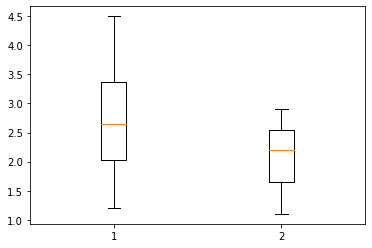

In [104]:
import matplotlib.pyplot as plt
x = [[1.2, 2.3, 3.0, 4.5],
     [1.1, 2.2, 2.9]]
plt.boxplot(x)
plt.show()

In [28]:
d = { 'A' : [1, 2, 3, 4, 5, 6, 7, 8, 9], 
'B' : 34, 
'C' : 12, 
'D' : [7, 8, 9, 6, 4] } 
  
count = 0
for l in d.values():
    for i in l: count += 1

TypeError: 'int' object is not iterable

In [1]:
G = nx.read_edgelist('edgelist_0819.txt', nodetype=str, data=(('weight',float),))

NameError: name 'nx' is not defined

In [10]:
G.number_of_edges() 

30201818

In [11]:
G.number_of_nodes()

700053

In [43]:
g.number_of_edges()

30201802

In [57]:
M = dict(G.degree())

In [127]:
import collections

In [128]:
def plotDegDistLogLog(G, loglog = True):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    frac = [n for n in cnt]
    fig, ax = plt.subplots()
    plt.plot(deg, frac, 'o')
    if loglog:
        ax.set_yscale('log', nonposy='clip')
        ax.set_xscale('log', nonposx='clip')
    plt.ylabel("Number of nodes")
    plt.xlabel("Degree")
    plt.savefig('Degree Dist.pdf')

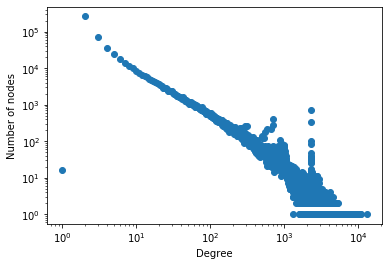

In [129]:
# Degree Distribution
plotDegDistLogLog(G, loglog = True)

In [ ]:
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)
# Fit the dummy power-law data
pars, cov = curve_fit(f=power_law, xdata=x_dummy, ydata=y_dummy, p0=[0, 0], bounds=(-np.inf, np.inf))
# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = y_dummy - power_law(x_dummy, *pars)
#data in the form of a power-law function can be linearized by plotting on a logarithmic plot — this time, both the x and y-axes are scaled
# Set the x and y-axis scaling to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')
# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the axis limits
ax.set_xlim(10, 10*6)
#ax.set_ylim(1, 10*)

In [2]:
# Isolate the sequence of degrees
degree_sequence = list(G.degree())

NameError: name 'G' is not defined

In [59]:
G.remove_nodes_from(node for node, degree in M.items() if degree <2) 

In [65]:
remove = [node for node,degree in M.items() if degree <2]

## Drawing 

In [ ]:
G_social = nx.read_edgelist('/home/bm7mp/git/oss-2020/Pydata/edgelist_0819.txt', nodetype=str, data=(('weight',float),))
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b) 

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]
# external edges
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edgelist=external, 
    edge_color="silver",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# internal edges
nx.draw_networkx(
    G_social, pos=pos, 

    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)
# Set node and edge communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
set_node_community(G_karate, communities)
set_edge_community(G_karate)

node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]
    karate_pos = nx.spring_layout(G_karate)

    plt.rcParams.update({'figure.figsize': (15, 10)})
    # Draw external edges
    nx.draw_networkx(
        G_karate,
        pos=karate_pos,
        node_size=0,
        edgelist=external,
        edge_color="silver")
    # Draw nodes and internal edges
    nx.draw_networkx(
        G_karate,
        pos=karate_pos,
        node_color=node_color,
        edgelist=internal,
        edge_color=internal_color)

In [47]:
def _find_whithin_community_edges(g, partition):

    within_edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci == cj:
            try:
                within_edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                within_edges[(ci, cj)] = [(ni, nj)]

    return within_edges


In [10]:
from graphviz import Digraph
import pydotplus

dot = Digraph(comment='The Round Table')

dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

print(dot.source)
dot.render('test-output/round-table.gv', view=True)

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


'test-output/round-table.gv.pdf'

In [11]:
import pygraphviz as pgz

In [39]:
G.number_of_edges()

30201802

In [2]:
import networkx as nx

In [18]:
K = nx.karate_club_graph()

In [11]:
pgz.graphviz?

In [ ]:
pydot_layout(G[, prog, root])

# Solution

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [3]:
nx.draw(G, pos=graphviz_layout(G), node_size=300, cmap=plt.cm.Blues, node_color=colors,  prog='dot')
plt.savefig('Githubnetwork.pdf')
plt.show()
 #node_color=range(len(G))


NameError: name 'G' is not defined

In [92]:
Resolution_Limit= np.sqrt(30201802*2)
print("Resolution Limit:", Resolution_Limit)

Resolution Limit: 7771.975553229693
